# First print your name in the cell below then save this file. (or something nice about your instructor)

In [2]:
# In this cell print your name 
print('Andy Zheng')

Andy Zheng


# Data wrangling with Pandas exercise
* For this exercise we will be using the `listings.csv` data file.

In [3]:
import pandas as pd
import numpy as np

# Load in the data file using `pd.read_csv()`

In [4]:
# Load data here
df = pd.read_csv('./data/listings.csv')

## Exercise 2 - Filtering

Return the following subsets of the dataframe.

1. How many listings are there with a price less than 100? 


2. Find how many listings there are in just Brooklyn.


3. Find how many listings there are in Brooklyn with a price less than 100.


4. Using `.isin()` select anyone that has the host name of Michael, David, John, and Daniel.


5. Create a new column called `adjusted_price` that has $100 added to every listing in Williamsburg.  The prices for all other listings should be the same as the were before. 


6. What % of the rooms are private, and what % of the rooms are shared.  
    * Hint, use `.value_counts()`


In [5]:
#  1. How many listings are there with a price less than 100? 
df[df['price'] < 100]['price'].value_counts()


50    1390
75    1205
60    1182
80    1112
70    1095
      ... 
10       4
15       4
14       2
11       1
9        1
Name: price, Length: 90, dtype: int64

In [6]:
#  2. Make a new DataFrame of listings in Brooklyn named `df_bk` 
#  and find how many listings in just Brooklyn.
df_bk = df[df['neighbourhood_group'] == 'Brooklyn'] 
df_bk.shape[0]

18632

In [7]:
# 3. Find how many listings there are in Brooklyn with a price less than 100.
df_bk[df_bk['price']<100].value_counts()

id        name                                                host_id    host_name         neighbourhood_group  neighbourhood              latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365
3831      Whole flr w/private bdrm, bath & kitchen(pls read)  4869       LisaRoxanne       Brooklyn             Clinton Hill               40.68514  -73.95976  Entire home/apt  75     1               340                2020-08-01   4.75               1                               265                 1
28438882  The Artist's House & Roof Garden (part 3!)          18007776   Tyler             Brooklyn             Prospect-Lefferts Gardens  40.65690  -73.95728  Private room     43     25              8                  2020-04-01   0.39               4                               0                   1
28217921  Heights IV                                          9130040    Candace          

In [8]:
# 4. Using `.isin()` select anyone that has the host name of Michael, David, John, and Daniel.
# How many total are there that have those names
names = ['Michael', 'David', 'John', 'Daniel']
df_bk[df_bk['host_name'].isin(names)].value_counts()


id        name                                                host_id    host_name  neighbourhood_group  neighbourhood  latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365
16595     LOFT HAVEN ~ Six Windows ~ Bricks ~ Plants ~ Quiet  64522      Daniel     Brooklyn             Williamsburg   40.70933  -73.96792  Entire home/apt  271    1               172                2020-07-14   1.44               1                               365                 1
20231046  2 bed/2 bath garden apt in heart of Bushwick        278284741  David      Brooklyn             Bushwick       40.69426  -73.90785  Entire home/apt  150    3               113                2020-08-09   3.11               1                               273                 1
27438452  TAO (The Ascending Oasis)                           204684505  David      Brooklyn             East Flatbush  40.63558  -73.94929  Entire

In [9]:
# 5. Create a new column called `adjusted_price` that has $100 added to every listing in Williamsburg.  
# The prices for all other listings should be the same as the were before. 
df_bk.loc[df_bk['neighbourhood'] == 'Williamsburg', 'price'] += 100
df_bk.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,88,4,180,2020-03-18,1.31,3,344
11,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,209,2,181,2020-03-16,1.32,1,0


In [10]:
# 6. What % of the rooms are private, and what % of the rooms are shared.  





# Exercise 3 - Grouping

1. Using `groupby`, count how many listings are in each neighbourhood_group.


2. Using `groupby`, find the mean price for each of the neighbourhood_groups. 


3. Using `groupby` and `.agg()`, find the min and max price for each of the neighbourhood_groups. 


4. Using `groupby`, find the median price for each room type in each neighbourhood_group.


5. Using `groupby` and `.agg()`, find the count, min, max, mean, median, and std of the prices for each room type in each neighbourhood_group.

In [11]:
# 1. Using `groupby`, count how many listings are in each neighbourhood_group.
df.groupby('neighbourhood_group').count()



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,1183,1181,1183,1183,1183,1183,1183,1183,1183,1183,1183,957,957,1183,1183
Brooklyn,18632,18626,18632,18624,18632,18632,18632,18632,18632,18632,18632,14865,14865,18632,18632
Manhattan,20580,20570,20580,20555,20580,20580,20580,20580,20580,20580,20580,15197,15197,20580,20580
Queens,5791,5791,5791,5789,5791,5791,5791,5791,5791,5791,5791,4513,4513,5791,5791
Staten Island,341,341,341,341,341,341,341,341,341,341,341,284,284,341,341


In [12]:
# 2. Using `groupby`, find the mean price for each of the neighbourhood_groups. 

df.groupby('neighbourhood_group')[['price']].mean()


,price
neighbourhood_group,
Bronx,92.751479
Brooklyn,120.225258
Manhattan,191.880466
Queens,99.754965
Staten Island,110.947214


In [13]:
# 2.5. Using `groupby`, find the mean price for each room_type. 
df.groupby('room_type')[['price']].mean()

,price
room_type,
Entire home/apt,199.395950
Hotel room,275.015075
Private room,91.453084
Shared room,87.063830


In [14]:
# 4. Using `groupby`, find the mean price for each room_type in each neighbourhood_group.
df.groupby(['room_type','neighbourhood_group'])[['price']].mean()


price
room_type       neighbourhood_group            
Entire home/apt Bronx                138.004819
                Brooklyn             171.587687
                Manhattan            231.335572
                Queens               150.168900
                Staten Island        151.720930
Hotel room      Brooklyn             147.300000
                Manhattan            292.515670
                Queens               139.058824
Private room    Bronx                 68.419668
                Brooklyn              71.291189
                Manhattan            128.277069
                Queens                69.972564
                Staten Island         70.312883
Shared room     Bronx                 66.391304
                Brooklyn              57.870091
                Manhattan            111.735084
                Queens                89.891892
                Staten Island         46.000000

In [15]:
# 5. Using `groupby` and `.agg()`, find the count, min, max, mean, median, and std of the prices 
# for each room type in each neighbourhood_group.

df.groupby(['room_type','neighbourhood_group'])['price'].agg(['count','min','max','mean','median','std'])



count  min    max        mean  median  \
room_type       neighbourhood_group                                          
Entire home/apt Bronx                  415   25   1404  138.004819   103.0   
                Brooklyn              9112   20  10000  171.587687   135.0   
                Manhattan            12209    0  10000  231.335572   165.0   
                Queens                2090   10  10000  150.168900   115.0   
                Staten Island          172   39   1200  151.720930   111.0   
Hotel room      Brooklyn                30    0    399  147.300000   129.0   
                Manhattan              351    0   2211  292.515670   210.0   
                Queens                  17    0    249  139.058824   149.0   
Private room    Bronx                  722   16    700   68.419668    55.0   
                Brooklyn              9159   10   2500   71.291189    60.0   
                Manhattan             7601   10  10000  128.277069    80.0   
                Queens                3499   18   9000   69.972564    55.0   
                Staten Island          163   20    800   70.312883    55.0   
Shared room     Bronx                   46   20    800   66.391304    44.0   
                Brooklyn               331   15   1500   57.870091    36.0   
                Manhattan              419   10  10000  111.735084    60.0   
                Queens                 185   14   3000   89.891892    40.0   
                Staten Island            6   19     82   46.000000    38.0   

                                            std  
room_type       neighbourhood_group              
Entire home/apt Bronx                126.032106  
                Brooklyn             236.732843  
                Manhattan            410.306439  
                Queens               252.606739  
                Staten Island        147.518392  
Hotel room      Brooklyn              91.153206  
                Manhattan            315.924085  
                Queens                50.743806  
Private room    Bronx                 57.337866  
                Brooklyn              69.023165  
                Manhattan            448.677306  
                Queens               163.814468  
                Staten Island         70.759593  
Shared room     Bronx                114.442703  
                Brooklyn              92.217618  
                Manhattan            502.728868  
                Queens               275.675158  
                Staten Island         28.446441

# Join and file saving.
1. Load the `prices.csv` and the `n_listings.csv`


2. Do join that keeps all the records for each table.
    * Neighbourhood groups should include ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'LongIsland']
       
       
3. Save your joined csv as `joined.csv`


4. Load your saved table and see if it looks the same or different that the DataFrame you used to create it. 

In [16]:
# 1. Load the `prices.csv` and the `n_listings.csv`
df_price = pd.read_csv('./data/prices.csv')
df_listing = pd.read_csv('./data/n_listings.csv', sep=';')


In [17]:
df_listing.head()
df_price.head()

,neighbourhood_group,mean_price
0,Bronx,92.751479
1,Brooklyn,120.225258
2,Manhattan,191.880466
3,Queens,99.754965
4,Staten Island,110.947214


In [18]:
# 2. Do join that keeps all the records for each table.

df_join = df_price.merge(df_listing,on='neighbourhood_group',how='left')
df_join

,neighbourhood_group,mean_price,n_listings
0,Bronx,92.751479,1183.0
1,Brooklyn,120.225258,18632.0
2,Manhattan,191.880466,20580.0
3,Queens,99.754965,NaN
4,Staten Island,110.947214,NaN


# Extra Credit
Every question below this cell is extra credit and optional.

### 1. (Easy) Explore this new PandasAI Package and tell me what its all about because I've never used it. 
* https://www.youtube.com/watch?v=5w6eZaoDVVk&ab_channel=CodingIsFun  
* See if you can use it on the listings.csv to find out some cool info. or answer some of the questions above. 

### 2. (Very Easy) Find other cool Panda packages / add ons and show us what they can do well. And how you installed them. 

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46522,44807522,Designer Gramercy Studio Townhouse by UNSQ,12941925,Brian,Manhattan,Gramercy,40.73433,-73.98383,Entire home/apt,145,7,0,NaN,NaN,1,164
46523,44807786,Cozy & comfy apt in the heart of Inwood Manhattan,284790520,Salar,Manhattan,Washington Heights,40.85820,-73.92733,Entire home/apt,87,6,0,NaN,NaN,2,85
46524,44811717,Comfortable safe environment 24hr security camera,362453686,Nicole,Brooklyn,East Flatbush,40.65399,-73.93287,Private room,59,3,0,NaN,NaN,1,90
46525,44814944,Upper West Side studio 86th Street,4039777,Fernando,Manhattan,Upper West Side,40.78731,-73.97029,Entire home/apt,80,30,0,NaN,NaN,1,113


AttributeError: 'PathCollection' object has no property 'hue'

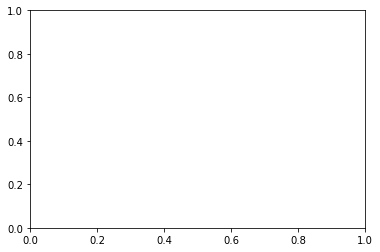

In [21]:
plt.scatter('price','number_of_reviews',data=df,hue = 'neighbourhood_group')

### 3. (Medium) Use the grammys.csv data for the next section of questions.

1. Who was won Album of the Year in 2016?


2. Who won Best Rap Album in 2009?


3. How many awards was Kendrick Lamar nomiated for, and how many did he win...?

In [ ]:
df_grammy = pd.read_csv('./data/grammys.csv')
df_grammy.info()

In [ ]:
# Who was won Album of the Year in 2016?
# df_grammy[(df_grammy['category'] == 'Album of the Year') & (df_grammy['year'] == 2016)]
df_grammy.loc[(df_grammy['category'] == 'Album of the Year') & (df_grammy['year'] == 2016),'workers']

In [ ]:
# Who won Best Rap Album in 2009?

df_grammy.loc[(df_grammy['category'] == 'Best Rap Album') & (df_grammy['year'] == 2009),'workers']

In [ ]:
# How many awards was Kendrick Lamar nomiated for, and how many did he win...?
Kendrick_nomiated = df_grammy.loc[(df_grammy['workers'] == 'Kendrick Lamar')]
print('Kendrick Lamar was nomiated for', Kendrick_nomiated.count(), 'awards.')

Kendrick_wins = Kendrick_nomiated.loc[(Kendrick_nomiated['winner'] == True)].count()
print('Kendrick Lamar won', Kendrick_wins, 'awards.')


### (Hard) Load the Game Logs for 2022 and add the column names using a dictionary.  
* [Link to the data page](https://www.retrosheet.org/gamelogs/)
* [Link to the column names](https://procatinator.com/)
* haha, gotta find them yourself!

### (Extra Hard) Download the files for the past 5 years and add them all into one data frame using pandas. 

In [33]:
gl2018 = pd.read_csv('./data/gl2018.txt')
gl2019 = pd.read_csv('./data/gl2019.txt')
gl2020 = pd.read_csv('./data/gl2020.txt')
gl2021 = pd.read_csv('./data/gl2021.txt')
gl2022 = pd.read_csv('./data/gl2022.txt')

In [36]:
gl2022.iloc[:, 49:80]

,26,3,0.13,0.14,1.5,3.1,0.15,0.16,1.6,7.2,...,0.22,27,9,0.23,0.24,2.6,0.25,vanol901,Larry Vanover,belld901
0,31,4,0,0,1,2,0,0,0,5,...,0,27,7,0,0,1,0,laynj901,Jerry Layne,wendh902
1,29,8,3,0,1,5,0,1,1,4,...,0,27,9,0,0,2,0,barrt901,Ted Barrett,barkl901
2,31,8,2,0,3,9,0,2,1,7,...,0,27,11,0,0,3,0,reynj901,Jim Reynolds,ticht901
3,32,6,1,0,1,1,1,0,0,2,...,0,27,10,0,0,2,0,carlm901,Mark Carlson,guccc901
4,29,4,0,1,0,1,0,0,1,1,...,0,27,10,0,0,0,0,hicke901,Ed Hickox,carav901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,37,15,4,0,0,9,0,1,2,3,...,0,27,10,0,0,0,0,merzd901,Dan Merzel,valej901
2425,31,12,2,1,1,3,0,0,0,2,...,0,27,10,0,0,0,0,rippm901,Mark Ripperger,barbs901
2426,27,4,1,0,1,3,0,2,0,2,...,0,27,12,0,0,2,0,becka901,Adam Beck,drakr901
2427,34,9,0,0,3,5,0,0,0,4,...,0,27,5,1,0,0,0,iassd901,Dan Iassogna,barrs901
